In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns

In [2]:
f=h5py.File(r'features_database_gait_two_cycles_both_legs.h5', 'r')
print(list(f.keys()))
x = f['right'][:,:,:]
y = f['left'][:,:,:]
print('(samples, timesteps, features)', x.shape)
print('(samples, timesteps, features)', y.shape)

['left', 'right']
(samples, timesteps, features) (28, 276, 7)
(samples, timesteps, features) (26, 276, 7)


In [3]:
nsamples_r, nx_r, ny_r = x.shape
d2_x_r = x.reshape((nsamples_r,nx_r*ny_r))

nsamples_l, nx_l, ny_l = y.shape
d2_x_l = y.reshape((nsamples_l,nx_l*ny_l))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler_r = StandardScaler()
scaler_r.fit(d2_x_r)
scaled_data_r = scaler_r.transform(d2_x_r)

scaler_l = StandardScaler()
scaler_l.fit(d2_x_l)
scaled_data_l = scaler_l.transform(d2_x_l)

In [5]:
scaled_data_r[:] = np.nan_to_num(scaled_data_r)
scaled_data_r

scaled_data_l[:] = np.nan_to_num(scaled_data_l)
scaled_data_l

array([[-1.22267435,  0.05630691, -0.5715779 , ..., -0.89653304,
         0.42794146, -0.66281856],
       [-1.90840876,  1.58146286, -0.80308318, ..., -3.1474704 ,
         1.50433924, -0.33194932],
       [-0.35911177,  0.56277204, -1.08919772, ..., -1.13858822,
        -1.04997721,  1.04939722],
       ...,
       [ 0.31472414, -0.92402367, -0.48923583, ...,  0.14859258,
         0.58714367, -0.84544729],
       [ 1.23243316, -0.7999598 , -0.89885525, ...,  0.84641101,
        -1.68199852,  1.78105282],
       [ 1.23243316, -0.7999598 , -0.89885525, ...,  0.84641101,
        -1.68199852,  1.78105282]])

In [6]:
from sklearn.decomposition import PCA

def pca_setup(scaled_data, components):
    pca = PCA(n_components=components, svd_solver='full')
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    x_new = pca.inverse_transform(x_pca)
    print("Original Shape:   ", scaled_data.shape)
    print("Transformed Shape:", x_pca.shape)
    
    return x_pca, pca

Original Shape:    (28, 1932)
Transformed Shape: (28, 7)
Original Shape:    (26, 1932)
Transformed Shape: (26, 7)


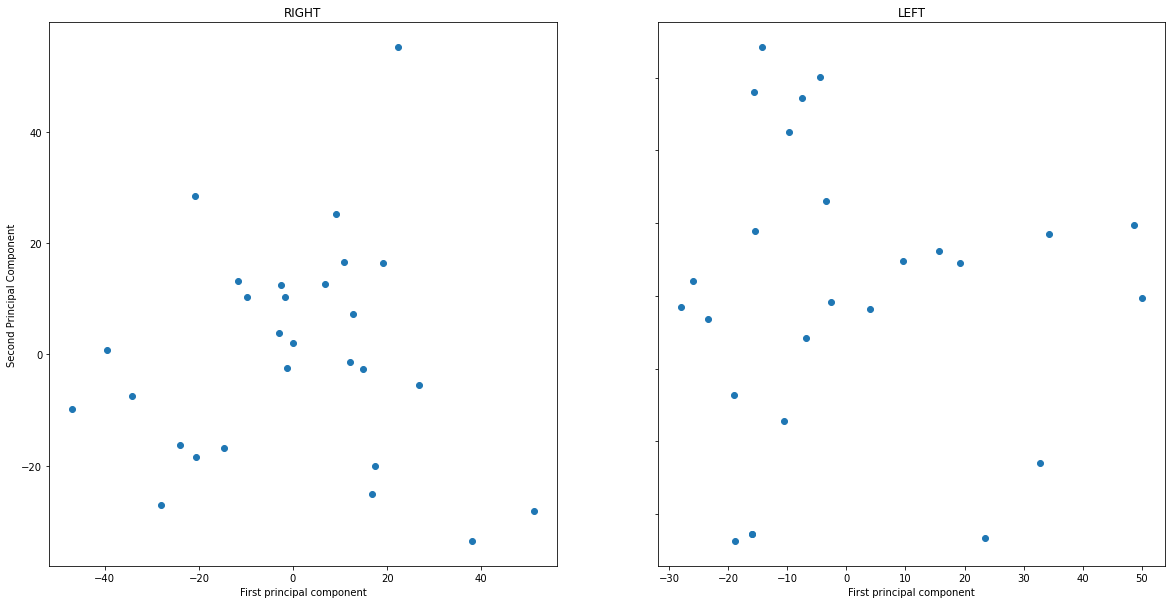

In [8]:
components = min(28, 7)
x_pca_r, pca_r = pca_setup(scaled_data_r,components)
components = min(26, 7)
x_pca_l, pca_l = pca_setup(scaled_data_l,components)

fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].scatter(x_pca_r[:,0],x_pca_r[:,1])
axs[0].set_title('RIGHT')
axs[1].scatter(x_pca_l[:,0],x_pca_l[:,1])
axs[1].set_title('LEFT')
    
for ax in axs.flat:
    ax.set(xlabel='First principal component', ylabel='Second Principal Component')
        
for ax in axs.flat:
    ax.label_outer()

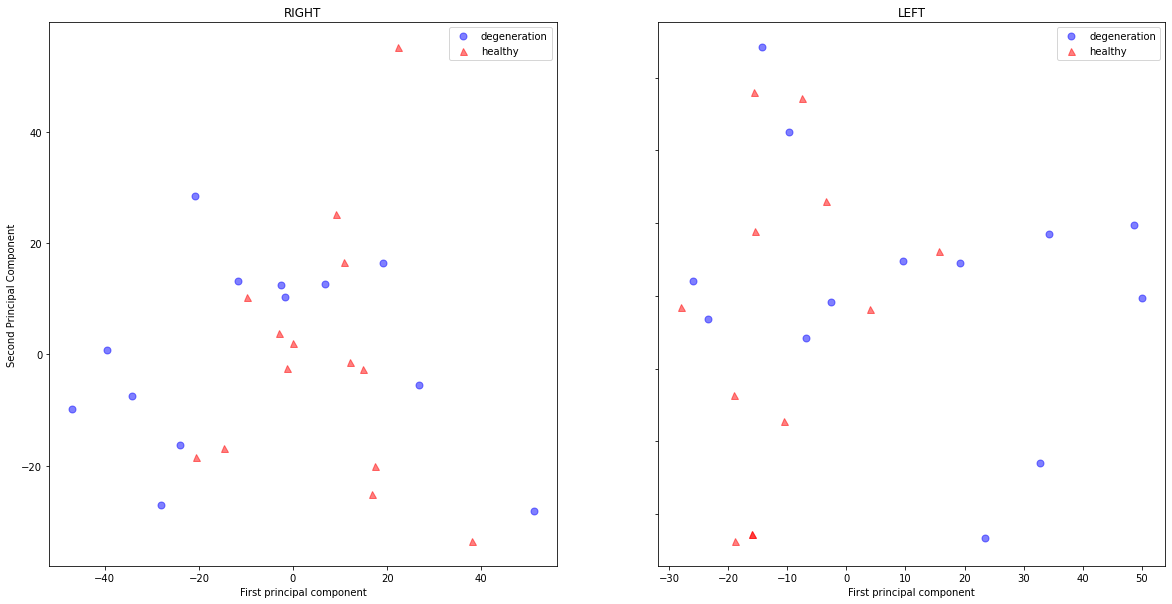

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(x_pca_r[0:13,0],x_pca_r[0:13,1], 'o', markersize=7, color='blue', alpha=0.5, label='degeneration')
axs[0].plot(x_pca_r[14:28,0], x_pca_r[14:28,1], '^', markersize=7, color='red', alpha=0.5, label='healthy')
axs[0].legend()
axs[0].set_title('RIGHT')
axs[1].plot(x_pca_l[0:13,0],x_pca_l[0:13,1], 'o', markersize=7, color='blue', alpha=0.5, label='degeneration')
axs[1].plot(x_pca_l[14:26,0], x_pca_l[14:26,1], '^', markersize=7, color='red', alpha=0.5, label='healthy')
axs[1].legend()
axs[1].set_title('LEFT')

for ax in axs.flat:
    ax.set(xlabel='First principal component', ylabel='Second Principal Component')
        
for ax in axs.flat:
    ax.label_outer()

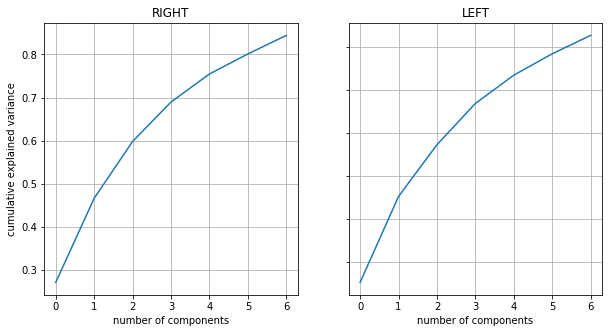

In [10]:
explained_variance_r = pca_r.explained_variance_ratio_
explained_variance_l = pca_l.explained_variance_ratio_

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.cumsum(explained_variance_r))
axs[0].grid()
axs[0].set_title('RIGHT')
axs[1].plot(np.cumsum(explained_variance_l))
axs[1].grid()
axs[1].set_title('LEFT')

for ax in axs.flat:
    ax.set(xlabel='number of components', ylabel='cumulative explained variance')
        
for ax in axs.flat:
    ax.label_outer()